In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [22]:
business=pd.read_json('Yelp_dataset_business_clean.json')

In [3]:
# business=business.dropna(subset=['categories'])
# restaurant=business[business['categories'].str.contains('Restaurants')]

In [4]:
review=pd.read_json('Yelp_dataset_review_clean.json')

In [8]:
stopwords = set(STOPWORDS) 
rest_5=business[business['stars']==5]
a=list(set(rest_5['business_id']))
all_reviews=""
for i in range(len(a)):
    b=list(review[review['business_id']==a[i]]['text'])
    bs=""
    bs = bs.join(b)
    all_reviews+=bs
    i = i + 1
    if (i % 100 == 0): print(i)

100
200
300
400
500
600


In [9]:
all_reviews = all_reviews.lower()
punc = '!()-[]{};:"\,<>./?@#%^&*_~'
for p in punc:
    all_reviews=all_reviews.replace(p,"")

    
replace=["food","order","location","place","one","time","go","minute","manager","said","pizza","employee","drive thru", 'even', 'back', 'ed', 'told', 'will', 'never', 'asked', 'give', 'went', 'drive', 'know', 'alway',
         ' s ', ' ing ', ' i ', ' t ', ' u ', ' od ', 'come', 'came', 'restaurant']

for s in replace:
    all_reviews=all_reviews.replace(s,"")

In [21]:
# wordcloud.words_.keys()
# len(all_reviews)
review.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

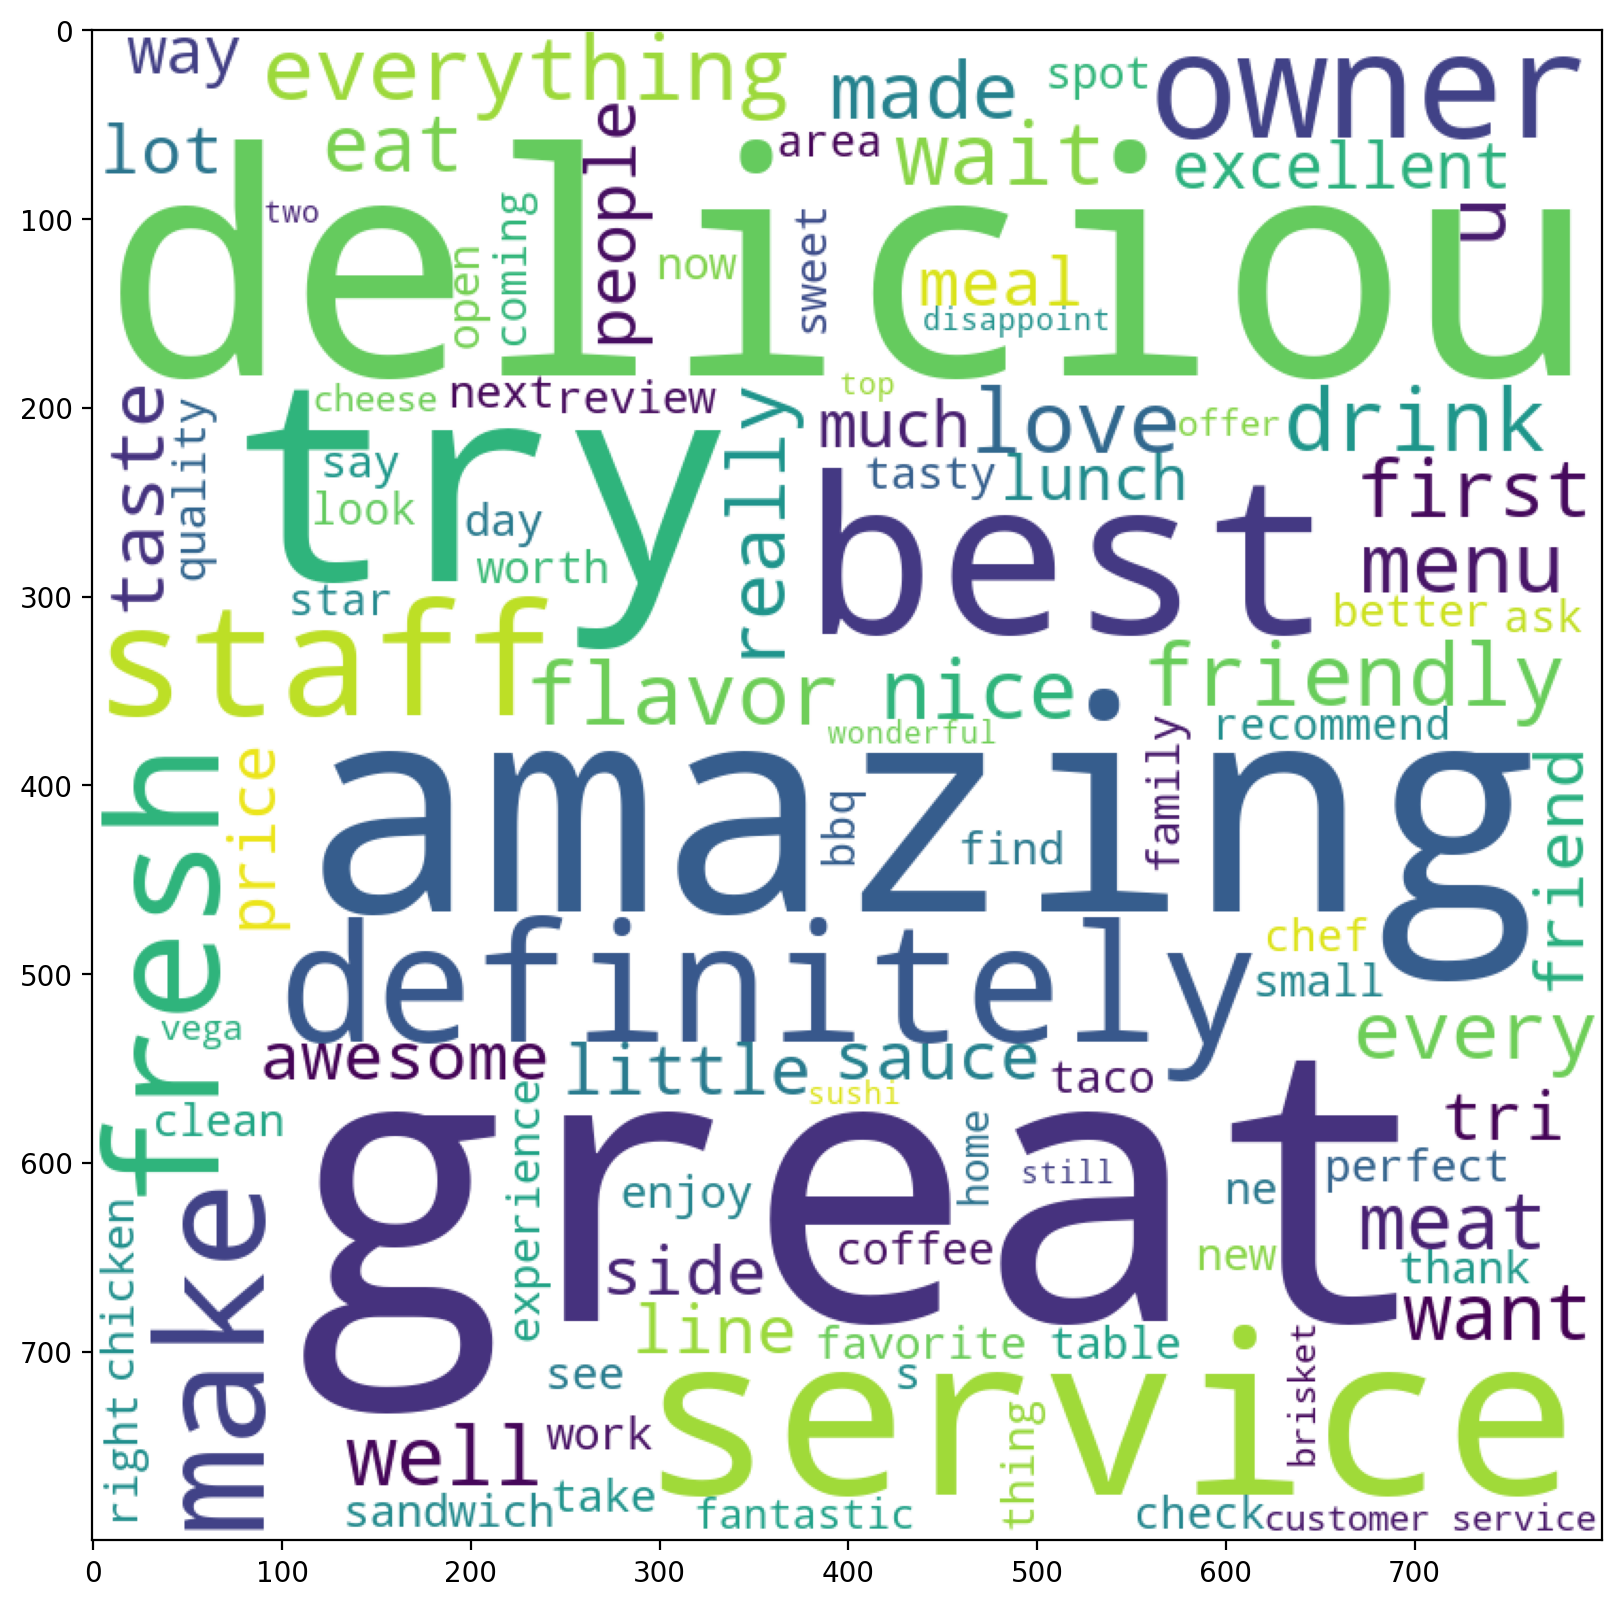

In [10]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', 
                      stopwords = stopwords, min_font_size = 10, max_words=100).generate(all_reviews) 
plt.figure(figsize = (10, 10), dpi = 200) 
plt.imshow(wordcloud) 

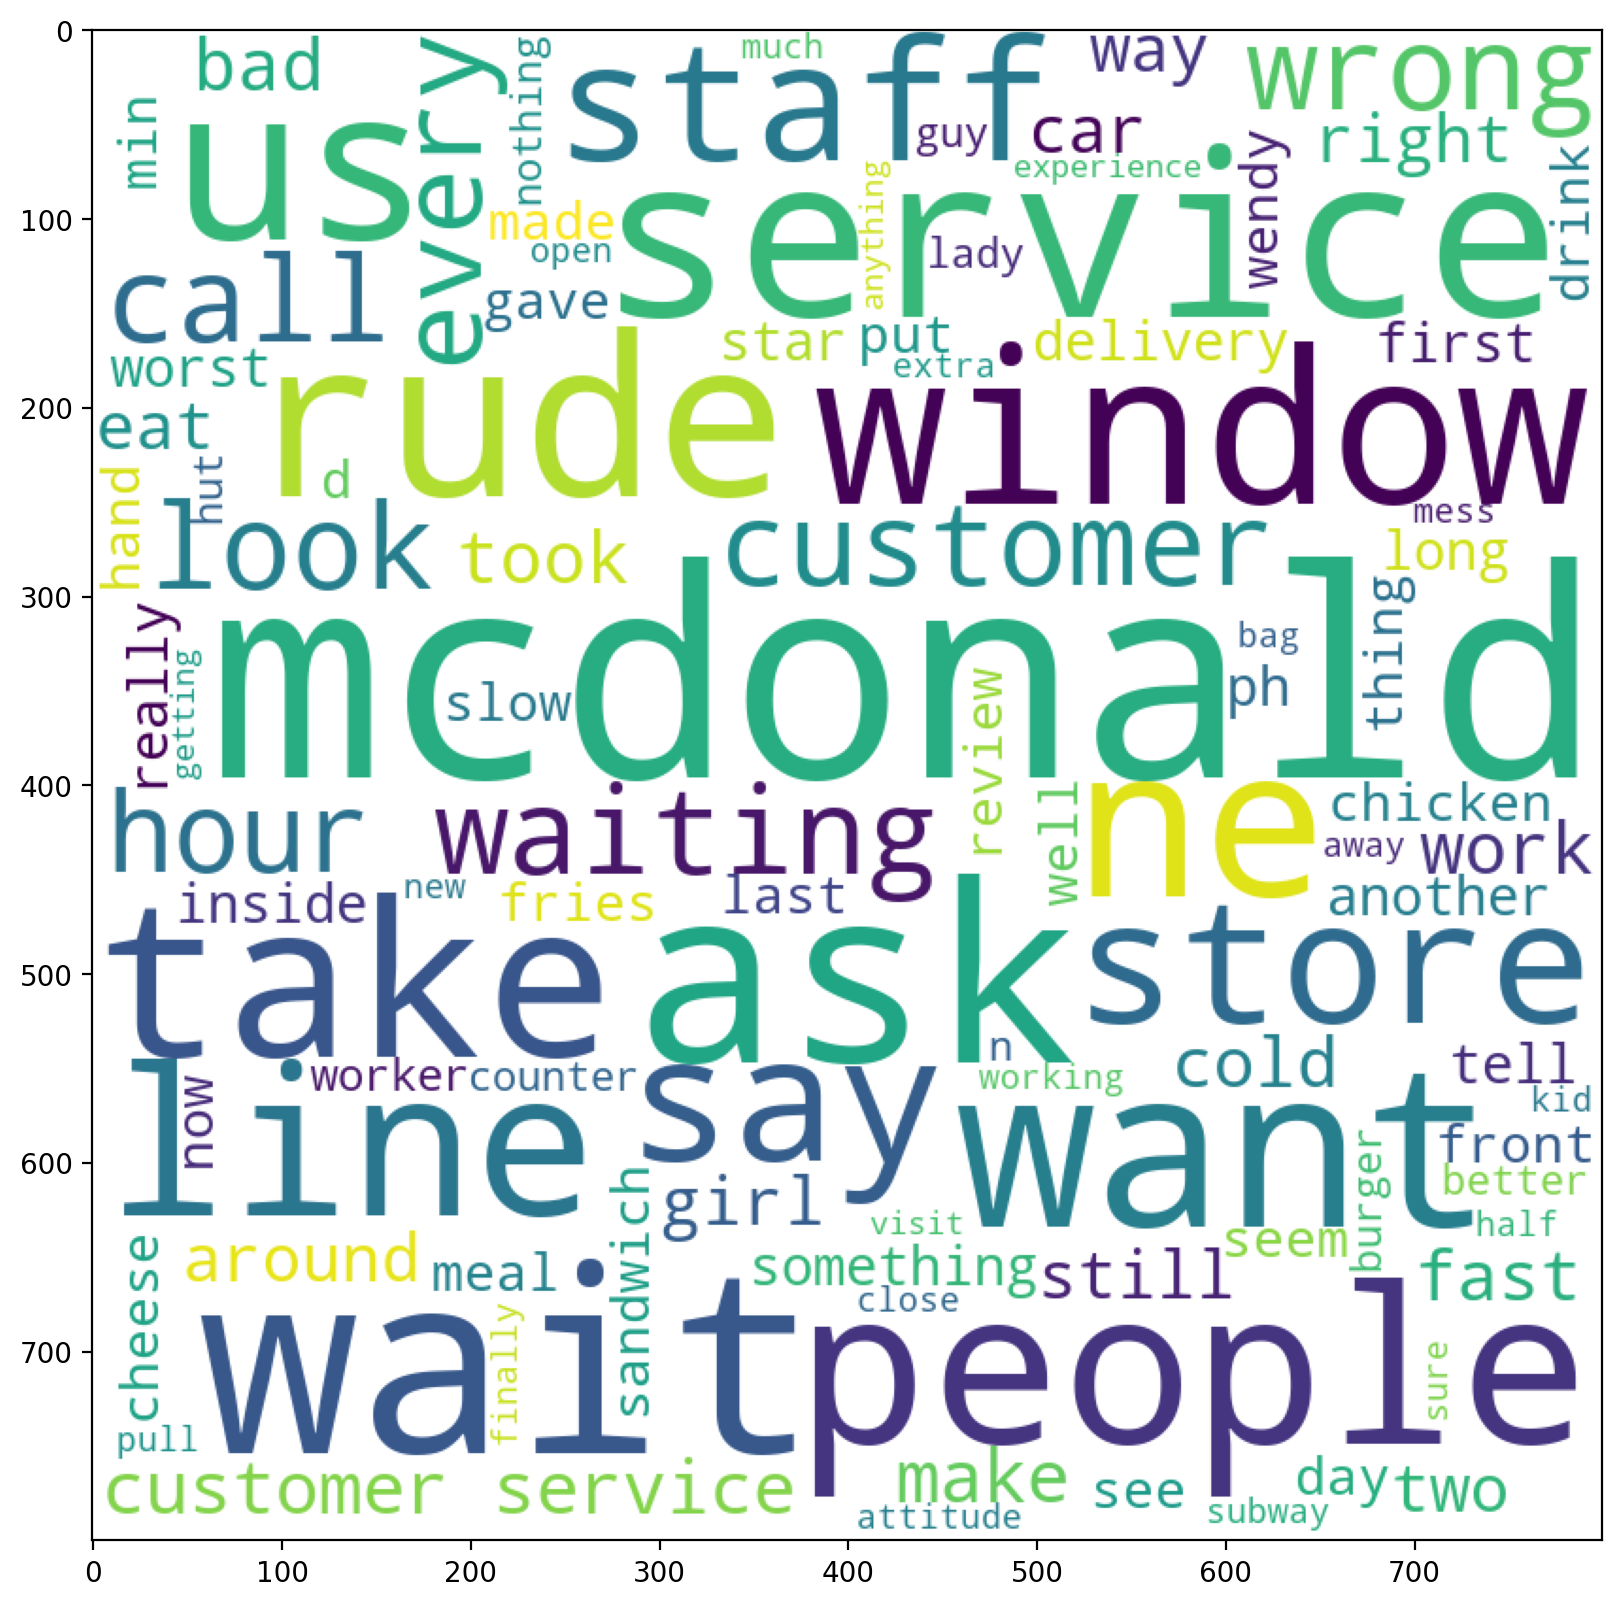

In [26]:
import gen_wordcloud as wc
wc.generate_wordcloud(business, review, 1, 100)